In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import wkt
from shapely.geometry import Polygon, LineString, Point


from spopt.region.skater import Skater
import hdbscan
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import folium
from folium.plugins import Fullscreen
import mapclassify
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
%cd ~/mids/flood-risk/modelingDBSCAN

[Errno 2] No such file or directory: '/Users/grantwilson/mids/flood-risk/modelingDBSCAN'
/Users/grantwilson/mids/flood-risk/modeling


In [4]:
df = gpd.read_file("data/modeling_data.geojson")

In [5]:
df.loc[(df["non_absorbant_x_elev_mean"] > 1.2) & (df["non_absorbant_features"] < 0)]

,ntaname,non_absorbant_features,absorbant_features,elev_mean,catch_basin_density,non_absorbant_x_elev_mean,total_population,geometry
3485,Washington Heights (South),-0.008644,0.008644,1.204763,-1.063884,1.217853,-0.120536,"POLYGON ((-73.93972 40.83516, -73.94022 40.835..."
3605,Washington Heights (South),-0.012866,0.012872,1.327009,-1.063884,1.240381,-0.120536,"POLYGON ((-73.93441 40.84331, -73.93467 40.842..."
3630,Washington Heights (South),-0.018236,0.018242,1.300375,0.084674,1.233479,0.231639,"POLYGON ((-73.93999 40.84595, -73.93993 40.845..."
3752,Washington Heights (North),-0.075167,0.075161,1.328538,-0.348522,1.220805,-0.120536,"POLYGON ((-73.93604 40.85491, -73.93689 40.855..."
5703,Windsor Terrace-South Slope,-0.053948,0.053937,1.218755,-0.522562,1.206383,-0.120536,"POLYGON ((-73.97851 40.65866, -73.97902 40.658..."
...,...,...,...,...,...,...,...,...
36342,Annadale-Huguenot-Prince's Bay-Woodrow,-0.020857,0.020852,1.148366,0.831412,1.203053,-0.120536,"POLYGON ((-74.21555 40.53857, -74.21562 40.537..."
36543,Arden Heights-Rossville,-0.003717,0.003706,1.242248,0.365436,1.226724,-0.120536,"POLYGON ((-74.20238 40.54522, -74.20333 40.545..."
36627,Annadale-Huguenot-Prince's Bay-Woodrow,-0.011297,0.011297,1.171769,-0.126893,1.210584,-0.120536,"POLYGON ((-74.21817 40.54225, -74.21991 40.541..."
36635,Annadale-Huguenot-Prince's Bay-Woodrow,-0.070822,0.070822,1.384505,0.514393,1.232946,-0.120536,"POLYGON ((-74.22106 40.53813, -74.22231 40.538..."


In [6]:
cluster = AgglomerativeClustering(n_clusters = 5)

In [7]:
df.columns

Index(['ntaname', 'non_absorbant_features', 'absorbant_features', 'elev_mean',
       'catch_basin_density', 'non_absorbant_x_elev_mean', 'total_population',
       'geometry'],
      dtype='object')

In [8]:
cluster.fit(df.drop(["ntaname", "geometry"], axis=1))

AgglomerativeClustering(n_clusters=5)

In [9]:
cluster.labels_.max()

4

In [10]:
df["cluster"] = cluster.labels_

In [11]:
## Run if there is no current CRS for df
# df = df.set_crs("EPSG:2263")
df = df.to_crs("WGS84")

In [13]:
db = DBSCAN(eps = 0.2, min_samples = 60).fit(df[['non_absorbant_features','elev_mean','catch_basin_density','total_population']])

In [15]:
df["cluster"] = db.labels_

(-74.28337047880946, -73.67222994887652, 40.47516404816598, 40.936502715947434)

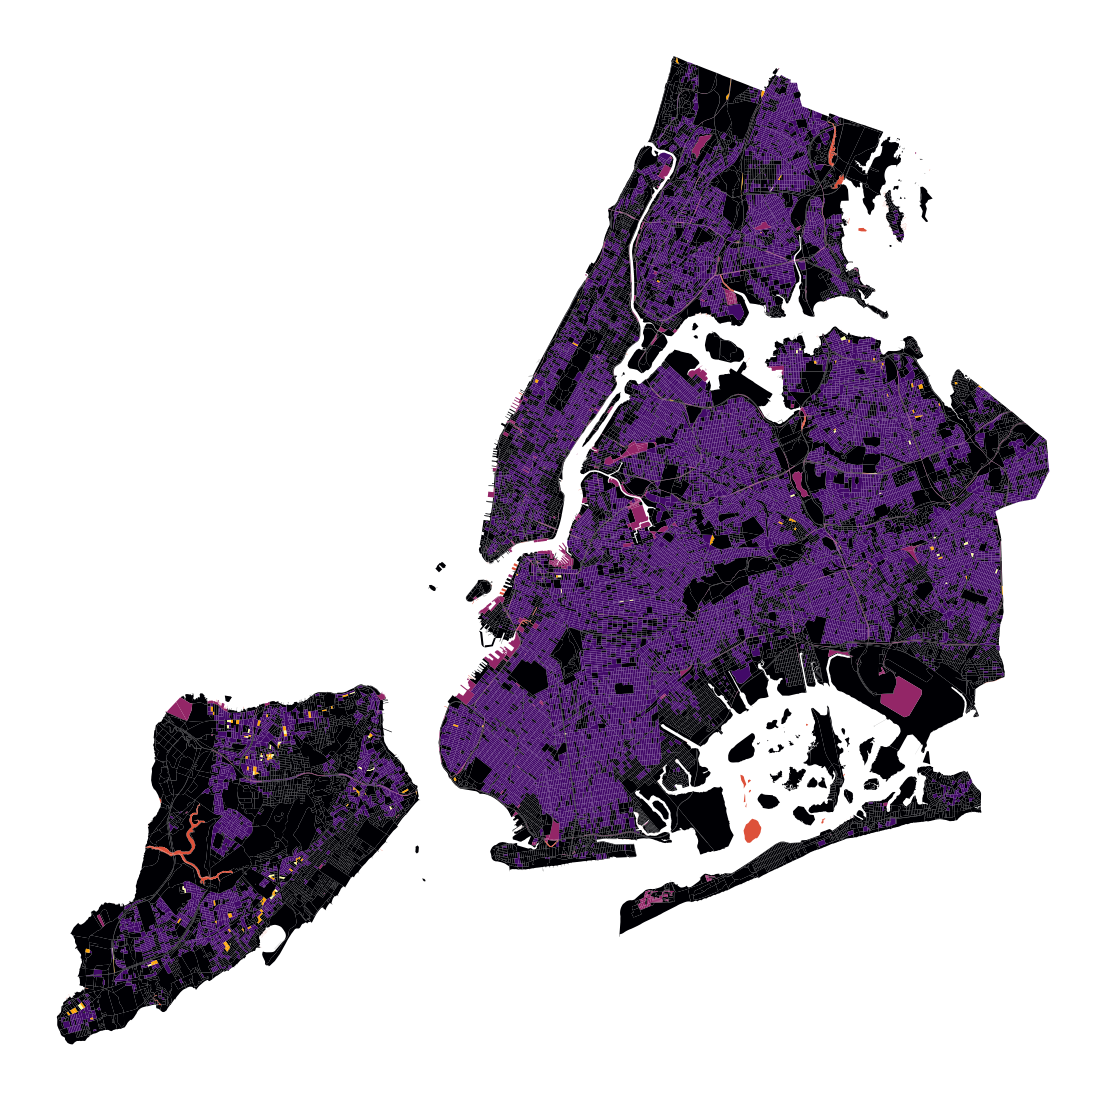

In [16]:
df.plot(column = "cluster",
        categorical=True,
        figsize = (25, 20), cmap="inferno")
plt.axis("off")

In [17]:
plt.savefig("../website/images/ny.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
df.crs

In [18]:
m = folium.Map(location = (40.730610, -73.935242), tiles = "CartoDB dark_matter", zoom_start = 12)
Fullscreen().add_to(m)

In [19]:
df.explore(column = "cluster", m=m, categorical=True, cmap = "inferno").save("../website/pages/model.html")